# Tweets distribution

### Import data

In [ ]:
import os
from google.colab import drive


# tweets folder contains all tweets
drive.mount('/content/drive')
dataset = '/content/drive/My Drive/covid_project/tweets'
print(dataset)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/covid_project/tweets


In [ ]:
!pip install jsonlines

### make counter < account : # tweets >

In [ ]:
import glob
import jsonlines
from collections import Counter

accounts = Counter()
for file in glob.glob(dataset+"/*.jsonl"):
  with jsonlines.open(file) as infile:
      for line in infile:
          user = line['user']['name']
          accounts[user] += 1


In [ ]:
print(f"Unique accounts: {len(accounts)}")
#print(accounts)

Unique accounts: 1169150


### Plot distribution

First 20 values: 

#1 795383
#2 186736
#3 68835
#4 34746
#5 20654
#6 13716
#7 9470
#8 6900
#9 5168
#10 4056
#11 3209
#12 2534
#13 2107
#14 1796
#15 1463
#16 1253
#17 1074
#18 953
#19 869
#20 691

90.0% of accounts have less than 4 tweets




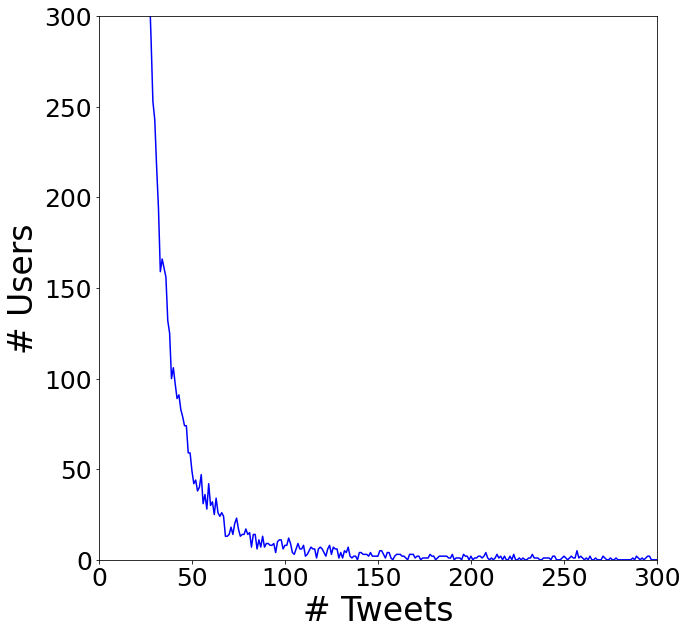

In [ ]:
from matplotlib  import pyplot as plt

# find distribution
values = accounts.values()

n_tweets = Counter()
for val in values:
    n_tweets[val] += 1


# set params
threshold = 0.9
to_show = 20
to_show_end = 200
to_plot_x = 300
to_plot_y = 300


# print distribution values
X, Y = [], []
found_threshold = False
threshold_val = 0
s = 0
tot = sum(n_tweets.values())

print(f"First {to_show} values: \n")
for x in range(1, max(values)):
    X.append(x)
    Y.append(n_tweets[x])
    if x < to_show+1:
        print(f"#{x} {n_tweets[x]}")
    s += n_tweets[x]
    if not found_threshold and s/tot > threshold:
        found_threshold = True
        threshold_val = x

print(f"\n{threshold*100}% of accounts have less than {threshold_val} tweets\n\n")


# adjust plot view
plt.plot(X,Y, color="blue", lw=1.5)
plt.gcf().set_size_inches(10, 10)

plt.rcParams.update({'font.size': 33})
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)


plt.xlim((0,to_plot_x))
plt.ylim((0,to_plot_y))

plt.xlabel("# Tweets")
plt.ylabel("# Users")

plt.show()